In [1]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv')

In [2]:
df

,Unnamed: 0,embedded,label
0,0,[-5.96681118e-01 4.11902845e-01 -3.08486857e-...,1
1,1,[-6.81407630e-01 4.91403908e-01 -1.21448785e-...,1
2,2,[-5.65098464e-01 5.53117573e-01 -3.84215899e-...,1
3,3,[-3.87674928e-01 2.98460498e-02 2.36579791e-...,1
4,4,[-3.86169583e-01 3.35951298e-01 -1.87801272e-...,1
...,...,...,...
11610,11610,[-8.07900906e-01 3.43788892e-01 8.81809518e-...,0
11611,11611,[-9.04891670e-01 2.89417118e-01 -2.94612855e-...,0
11612,11612,[-6.90551698e-01 1.35520011e-01 -2.52938084e-...,0
11613,11613,[-7.32276261e-01 5.08924425e-01 -2.66482718e-...,0


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df

,embedded,label
0,[-5.96681118e-01 4.11902845e-01 -3.08486857e-...,1
1,[-6.81407630e-01 4.91403908e-01 -1.21448785e-...,1
2,[-5.65098464e-01 5.53117573e-01 -3.84215899e-...,1
3,[-3.87674928e-01 2.98460498e-02 2.36579791e-...,1
4,[-3.86169583e-01 3.35951298e-01 -1.87801272e-...,1
...,...,...
11610,[-8.07900906e-01 3.43788892e-01 8.81809518e-...,0
11611,[-9.04891670e-01 2.89417118e-01 -2.94612855e-...,0
11612,[-6.90551698e-01 1.35520011e-01 -2.52938084e-...,0
11613,[-7.32276261e-01 5.08924425e-01 -2.66482718e-...,0


In [5]:
df['label'].value_counts()

label
1    5828
0    5787
Name: count, dtype: int64

In [6]:
import pandas as pd
import numpy as np
import ast
import re

# Define a cleanup function
def fix_and_eval(vector_str):
    try:
        # Insert missing commas between adjacent numbers using regex
        cleaned_str = re.sub(r'(?<=[\deE])\s+(?=[\-\d])', ', ', vector_str.strip())
        return np.array(ast.literal_eval(cleaned_str))
    except Exception as e:
        print("Error parsing:", vector_str[:100], "\nError:", e)
        return np.nan

# Apply the cleanup function
df['embedded'] = df['embedded'].apply(fix_and_eval)

# Optional: drop rows with failed parsing
df = df.dropna(subset=['embedded'])
from sklearn.model_selection import train_test_split

X = np.stack(df['embedded'].values)
y = df['label'].values


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, roc_curve, auc

# Example Data (Use your own dataset here)
# X, y = your_data

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Development

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='lbfgs')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    return model, y_pred


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)


    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


Accuracy: 0.5208781747739991
Precision: 0.533167495854063
Recall: 0.5389773679798826
F1 Score: 0.5360566902876198


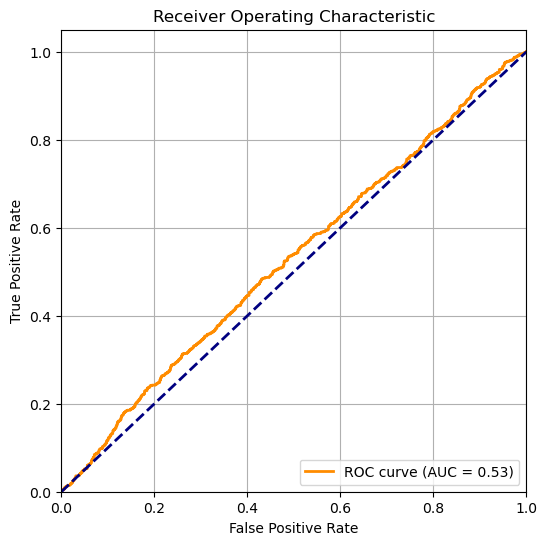

In [10]:
model, y_pred = train_logistic_regression(X_train, y_train, X_test, y_test)
plot_roc_curve(model, X_test, y_test)


## SVM

Fold 1 - AUC: 0.51
Fold 2 - AUC: 0.50
Fold 3 - AUC: 0.50
Fold 4 - AUC: 0.50
Fold 5 - AUC: 0.50

Average Metrics Across Folds:
Accuracy: 0.49
Precision: 0.49
Recall: 0.51
F1 Score: 0.50
ROC AUC: 0.50


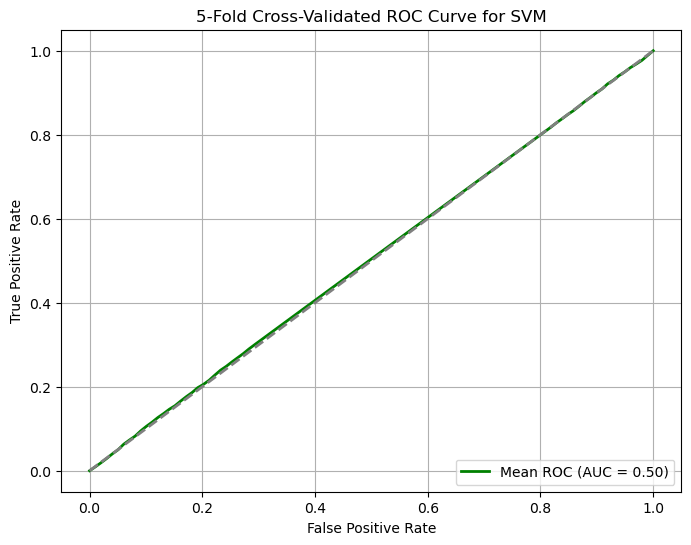

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
)

# Example Data (use your actual dataset)
# X, y = your_data

# Set number of folds
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize metric containers
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

mean_fpr = np.linspace(0, 1, 100)
tprs = []

# K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Normalize features within the fold
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train SVM
    svm = SVC(kernel='linear', probability=True, random_state=42)
    svm.fit(X_train, y_train)

    # Predictions
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:, 1]

    # Store metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    # Interpolate ROC curve
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)

    print(f"Fold {fold} - AUC: {roc_auc:.2f}")

# Average metrics
print("\nAverage Metrics Across Folds:")
print(f"Accuracy: {np.mean(accuracies):.2f}")
print(f"Precision: {np.mean(precisions):.2f}")
print(f"Recall: {np.mean(recalls):.2f}")
print(f"F1 Score: {np.mean(f1_scores):.2f}")
print(f"ROC AUC: {np.mean(roc_aucs):.2f}")

# Plot mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='green', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{k}-Fold Cross-Validated ROC Curve for SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Decision Tree

## Naive Bayes

## Neural Networks

## Bagging - with top 3 performing models

## Boosting - Gradient Boosting 

# ROC Curve Analysis

## Graphing

## Analyzing

# Evaluation Functions

## Confusion Matrix

## F-1 Precision Recall